## Limpieza de datos

In [2]:
# Importar las librerías a usar
import pandas as pd
import seaborn as sns

In [3]:
#Cargar el archivo CSV
data = pd.read_csv("SeoulBikeData_utf8.csv")

In [4]:
#Eliminar la columna de fechas ya que no es relevante
data.head()
data = data.drop('Date', axis=1)
data

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
#Crear una copia del DF por si algo
datacopy = data

In [6]:
#Comprobar los valores que toma la columna Seasons
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [7]:
#Revisar que no existan duplicados en el DF
duplicates = len(data[data.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 0


In [8]:
#Revisar que no existan valores faltantes
missing_values = data.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 0


In [9]:
# Tipos de datos en el dataset
types = data.dtypes.value_counts()

print('Number of Features: %d'%(data.shape[1]))
print('Number of Customers: %d'%(data.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 13
Number of Customers: 8760
Data Types and Frequency in Dataset:
float64    6
int64      4
object     3
Name: count, dtype: int64


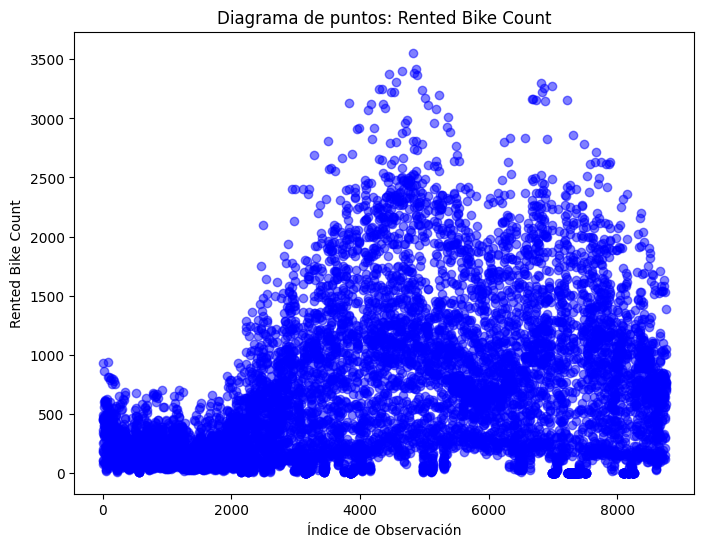

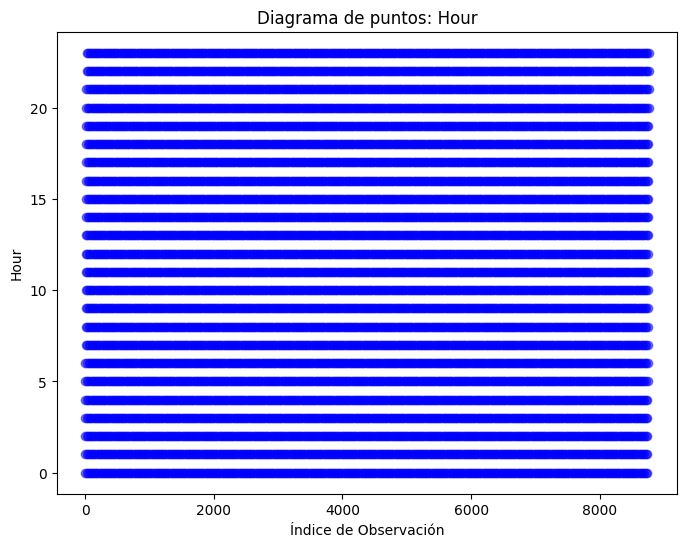

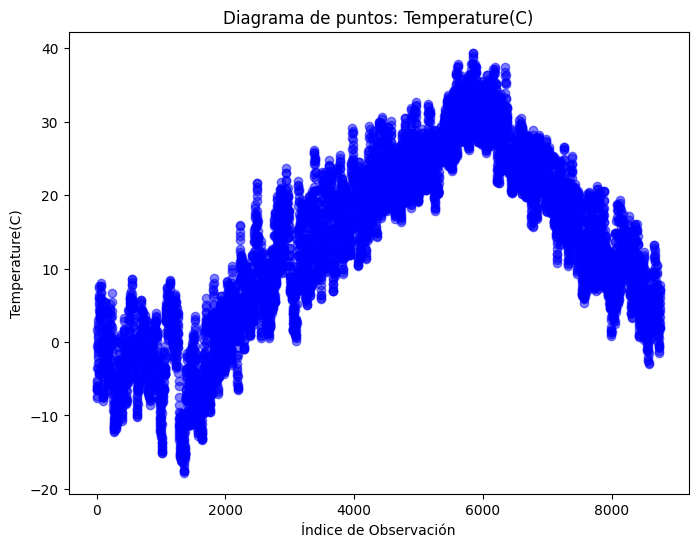

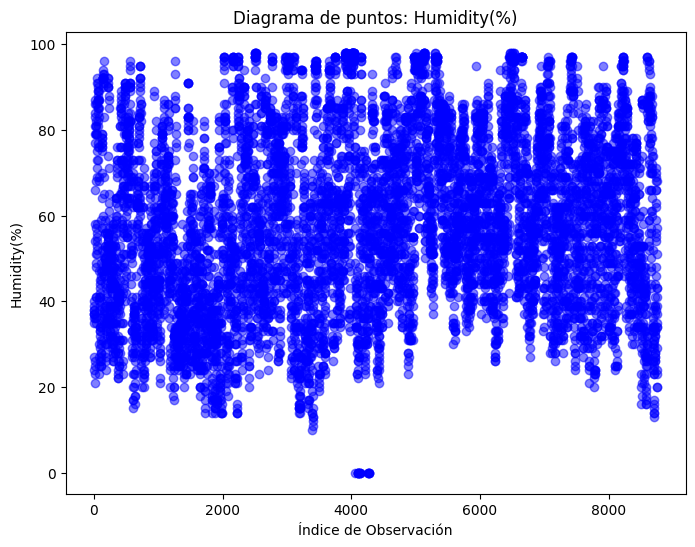

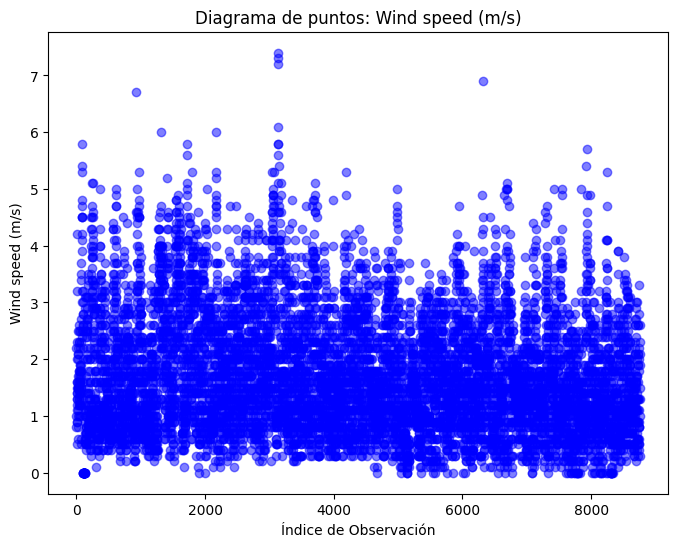

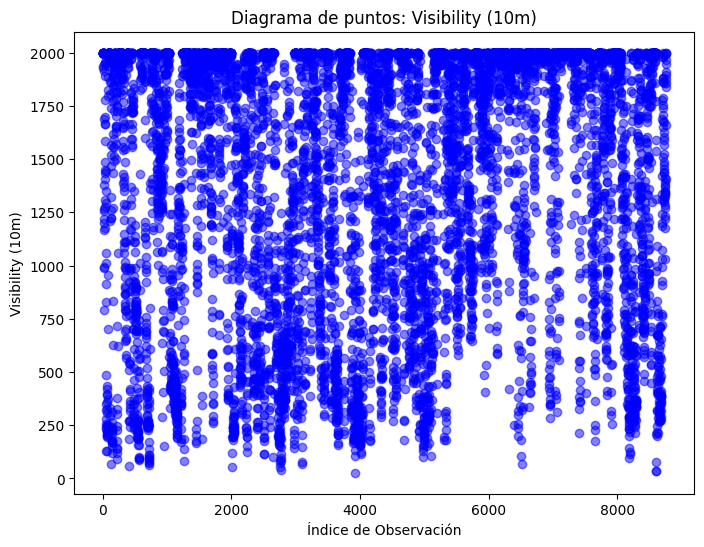

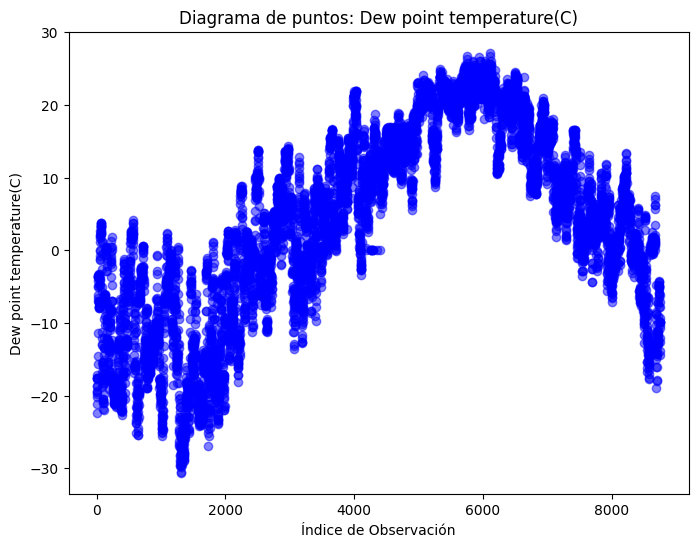

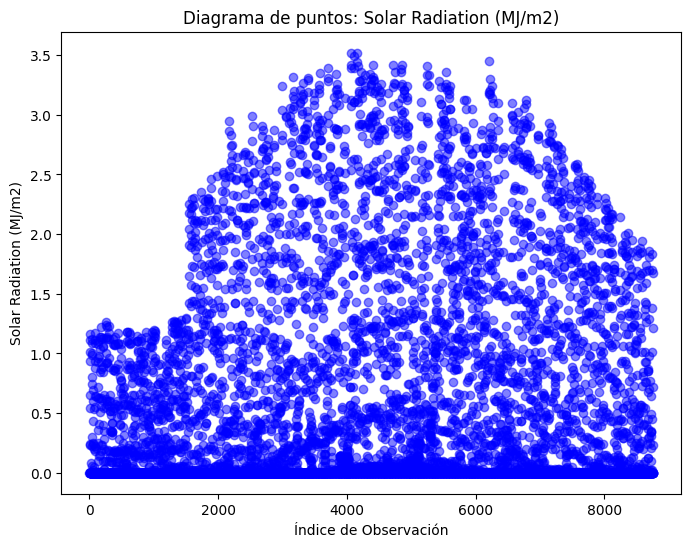

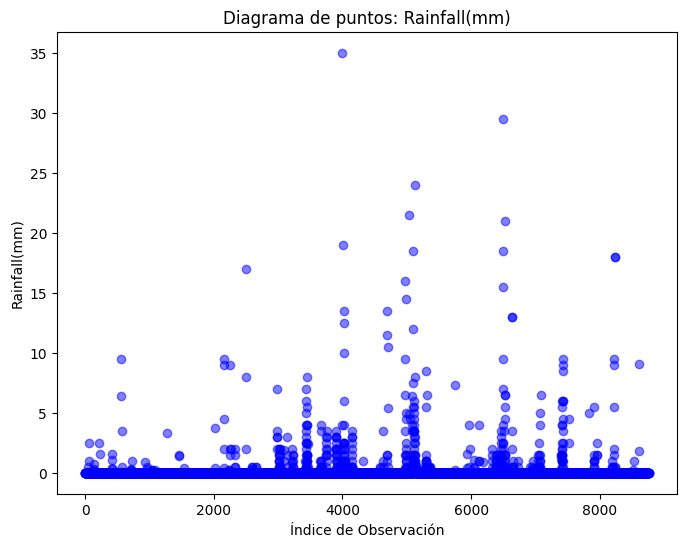

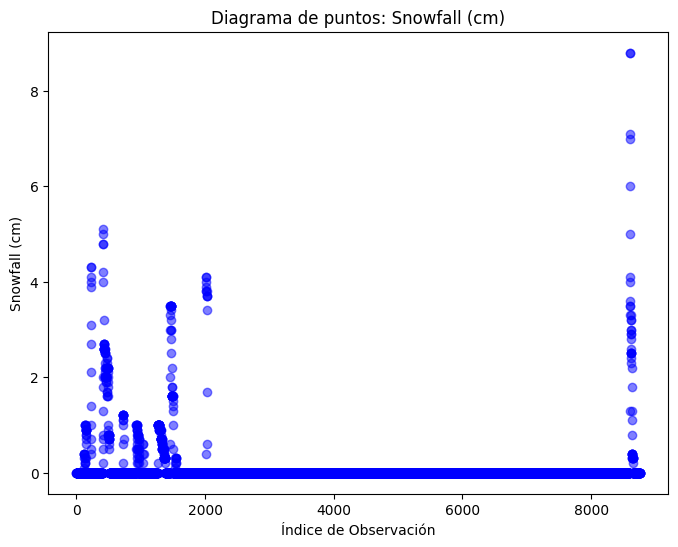

In [10]:
import matplotlib.pyplot as plt

numeric_variables = data.select_dtypes(include=['float64', 'int64'])

# Generar diagrama de puntos para cada variable numérica
for column in numeric_variables.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data.index, data[column], alpha=0.5, color='blue')
    plt.title(f'Diagrama de puntos: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

In [17]:
data.groupby("Seasons")["Wind speed (m/s)"].agg(['min', 'max', 'mean'])

,min,max,mean
Seasons,,,
Autumn,0.0,5.7,1.494734
Spring,0.1,7.4,1.874592
Summer,0.0,6.9,1.609420
Winter,0.0,6.7,1.922685


In [18]:
data.groupby("Seasons")["Rainfall(mm)"].agg(['min', 'max', 'mean'])

,min,max,mean
Seasons,,,
Autumn,0.0,18.0,0.122756
Spring,0.0,35.0,0.182880
Summer,0.0,29.5,0.253487
Winter,0.0,9.5,0.032824


In [19]:
data.groupby("Seasons")["Snowfall (cm)"].agg(['min', 'max', 'mean'])

,min,max,mean
Seasons,,,
Autumn,0.0,8.8,0.056319
Spring,0.0,0.0,0.000000
Summer,0.0,0.0,0.000000
Winter,0.0,5.1,0.247500


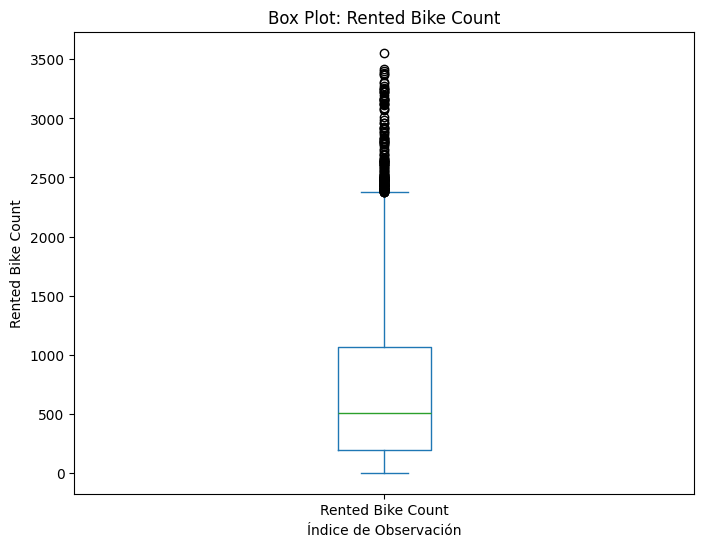

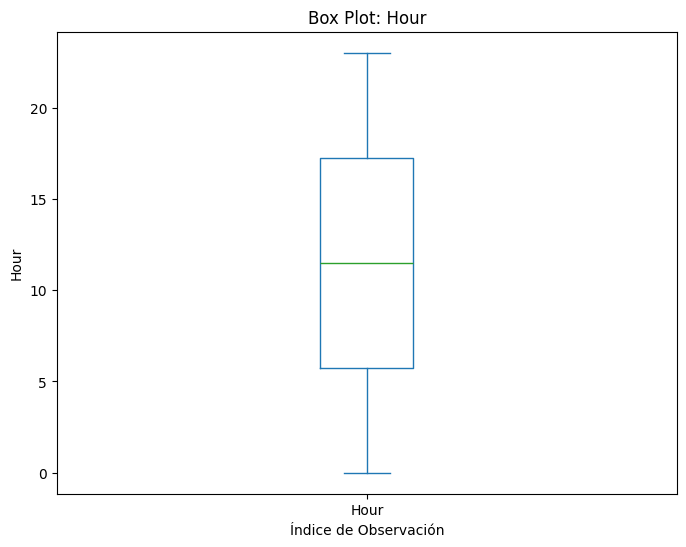

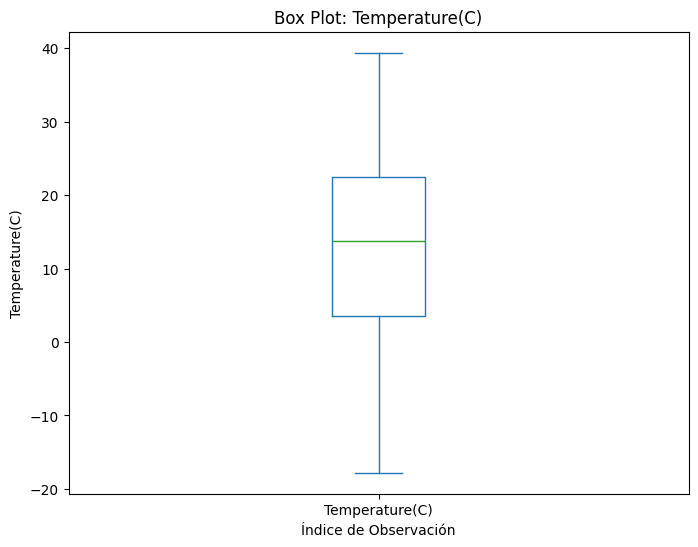

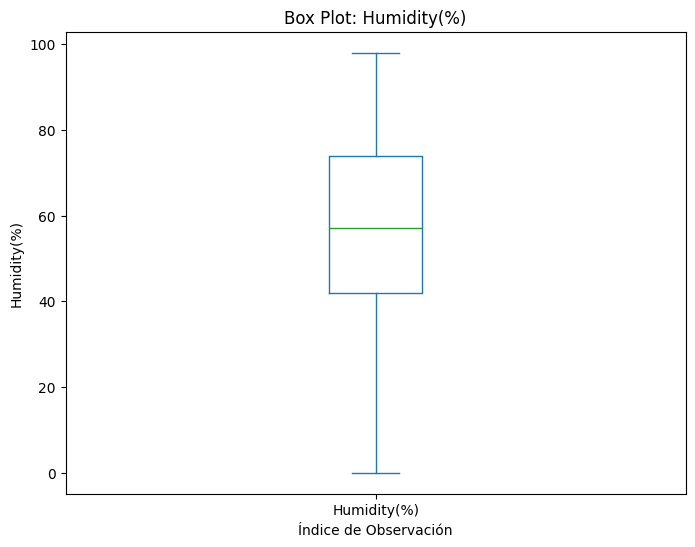

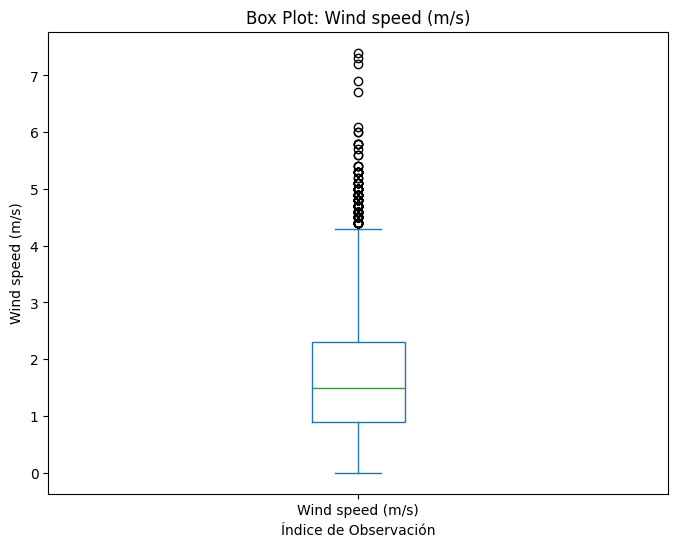

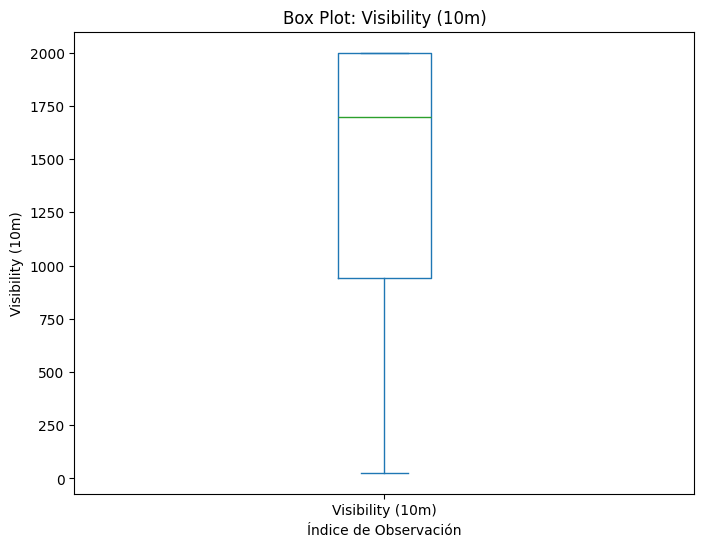

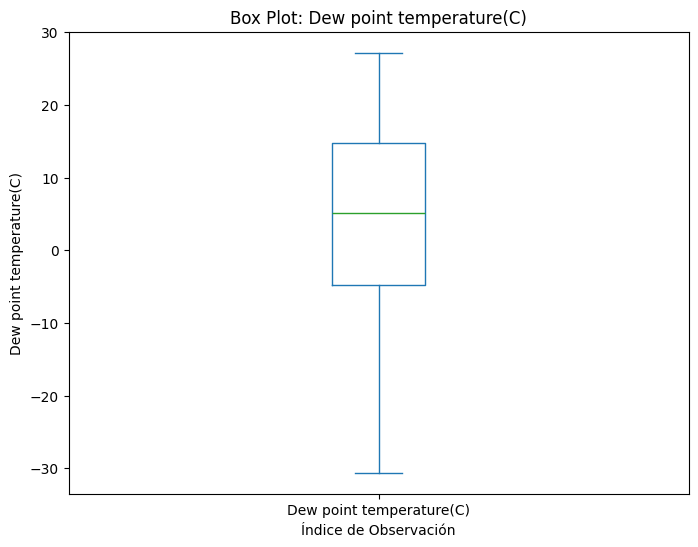

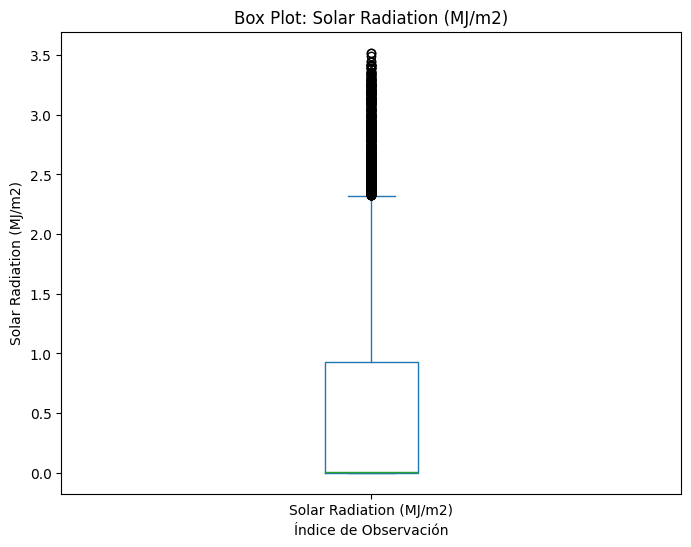

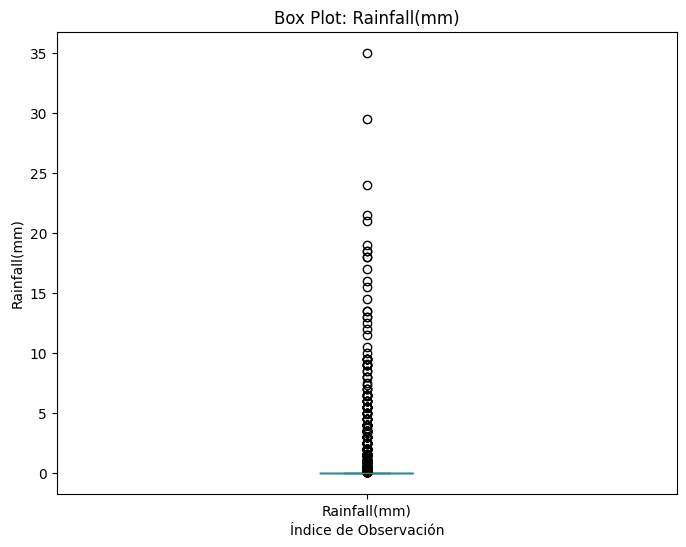

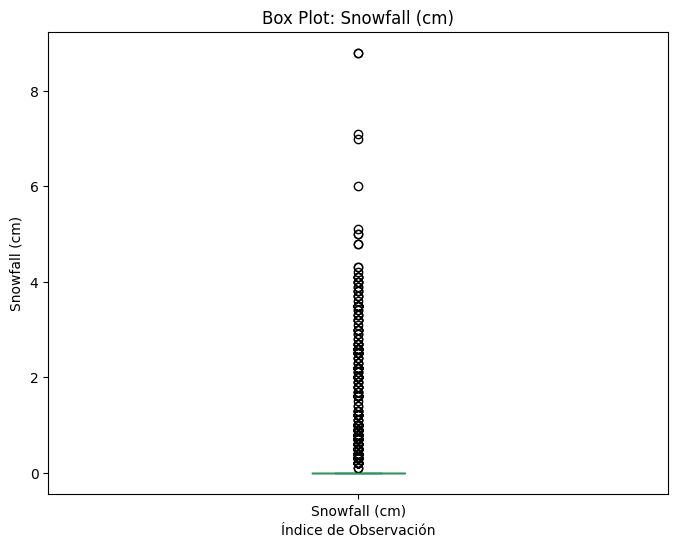

In [20]:
#Generar boxplot para cada variable númerica
for column in numeric_variables.columns:
    plt.figure(figsize=(8, 6))
    data[column].plot(kind='box')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

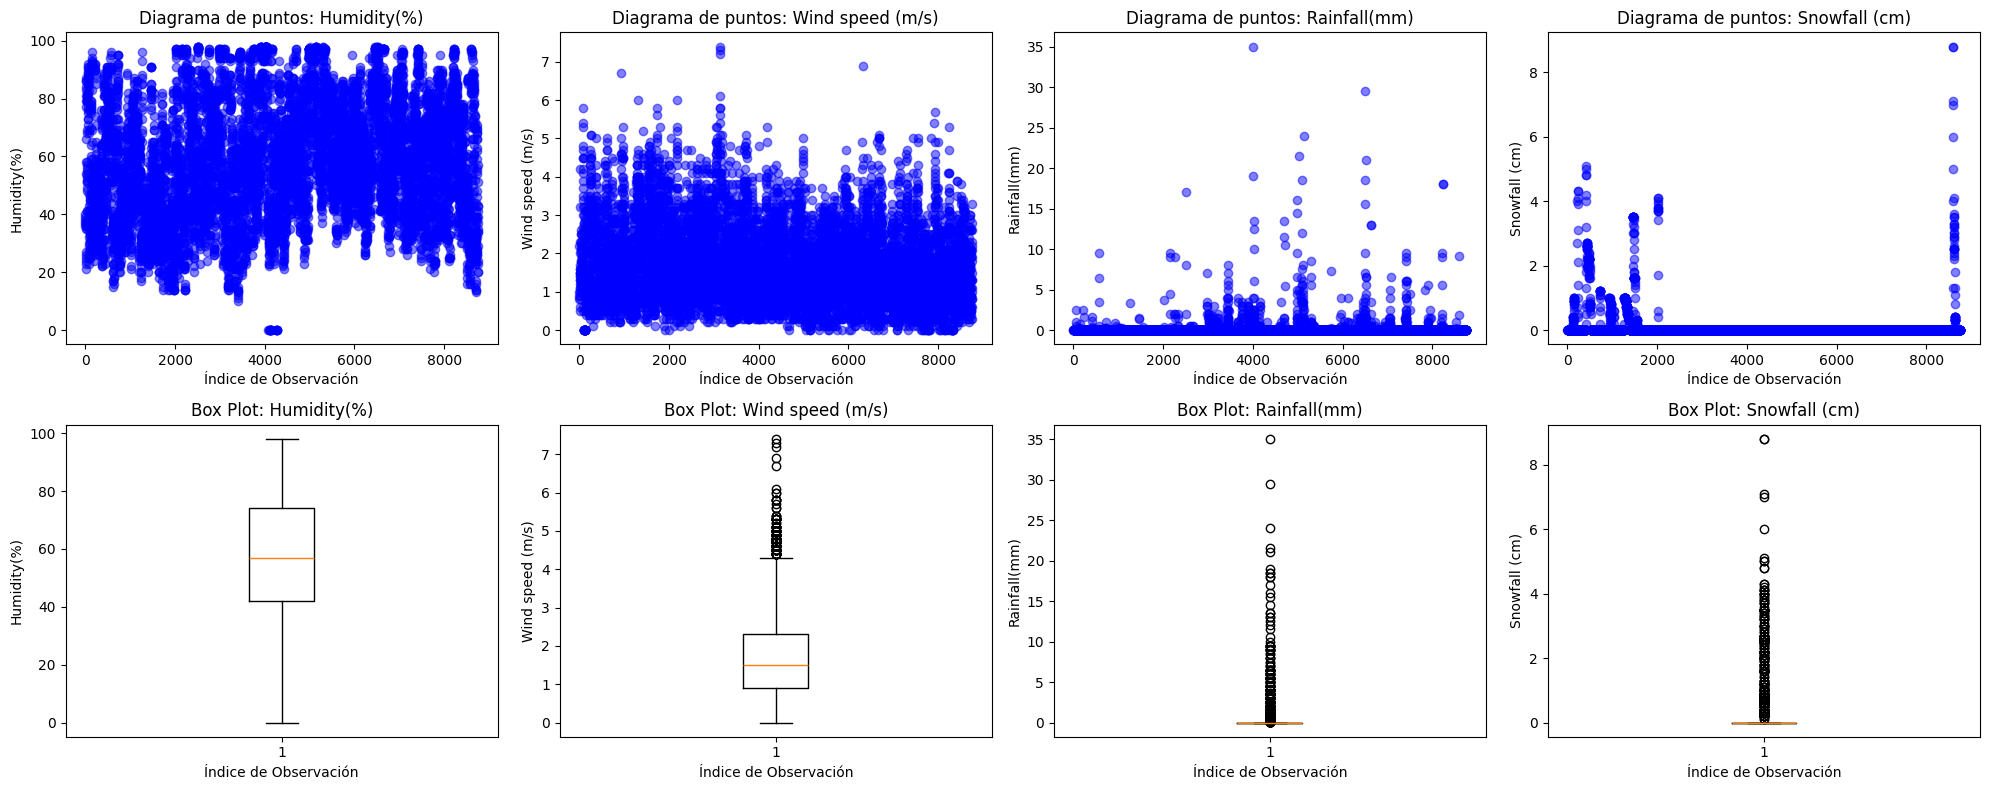

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(20, 8))

axs[0,0].scatter(data.index, data["Humidity(%)"], alpha=0.5, color='blue')
axs[0,0].set_title("Diagrama de puntos: Humidity(%)")
axs[0,0].set_xlabel("Índice de Observación")
axs[0,0].set_ylabel("Humidity(%)")

axs[0,1].scatter(data.index, data["Wind speed (m/s)"], alpha=0.5, color='blue')
axs[0,1].set_title("Diagrama de puntos: Wind speed (m/s)")
axs[0,1].set_xlabel("Índice de Observación")
axs[0,1].set_ylabel("Wind speed (m/s)")

axs[0,2].scatter(data.index, data["Rainfall(mm)"], alpha=0.5, color='blue')
axs[0,2].set_title("Diagrama de puntos: Rainfall(mm)")
axs[0,2].set_xlabel("Índice de Observación")
axs[0,2].set_ylabel("Rainfall(mm)")

axs[0,3].scatter(data.index, data["Snowfall (cm)"], alpha=0.5, color='blue')
axs[0,3].set_title("Diagrama de puntos: Snowfall (cm)")
axs[0,3].set_xlabel("Índice de Observación")
axs[0,3].set_ylabel("Snowfall (cm)")


axs[1,0].boxplot(data["Humidity(%)"])
axs[1,0].set_title("Box Plot: Humidity(%)")
axs[1,0].set_xlabel("Índice de Observación")
axs[1,0].set_ylabel("Humidity(%)")

axs[1,1].boxplot(data["Wind speed (m/s)"])
axs[1,1].set_title("Box Plot: Wind speed (m/s)")
axs[1,1].set_xlabel("Índice de Observación")
axs[1,1].set_ylabel("Wind speed (m/s)")

axs[1,2].boxplot(data["Rainfall(mm)"])
axs[1,2].set_title("Box Plot: Rainfall(mm)")
axs[1,2].set_xlabel("Índice de Observación")
axs[1,2].set_ylabel("Rainfall(mm)")

axs[1,3].boxplot(data["Snowfall (cm)"])
axs[1,3].set_title("Box Plot: Snowfall (cm)")
axs[1,3].set_xlabel("Índice de Observación")
axs[1,3].set_ylabel("Snowfall (cm)")

plt.tight_layout()
plt.savefig("Ejemplo Limpieza Reporte")
plt.show()


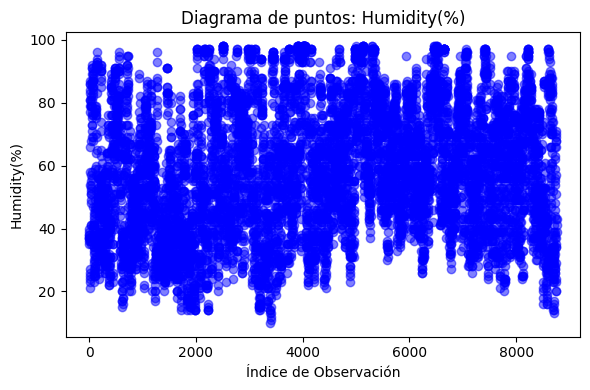

In [28]:
data2 = data[data["Humidity(%)"] >= 5]

plt.figure(figsize=(6, 4))
plt.scatter(data2.index, data2["Humidity(%)"], alpha=0.5, color='blue')
plt.title('Diagrama de puntos: Humidity(%)')
plt.xlabel('Índice de Observación')
plt.ylabel("Humidity(%)")
plt.tight_layout()
plt.savefig("Humedad_Arreglada")
plt.show()

In [26]:
data2.to_csv('Data_limpia.csv', index=False)